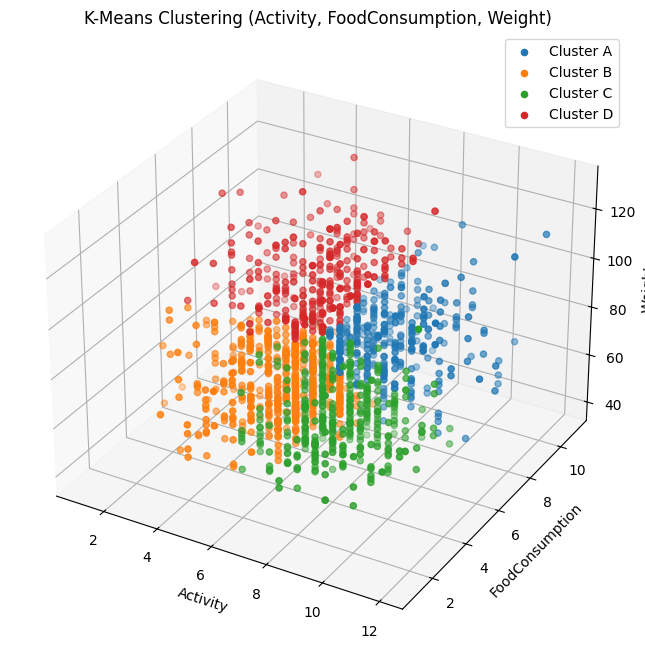

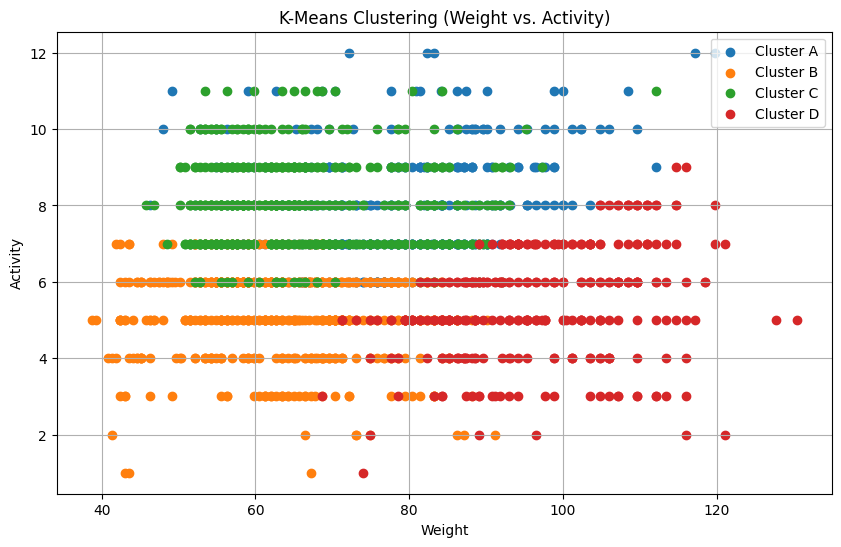

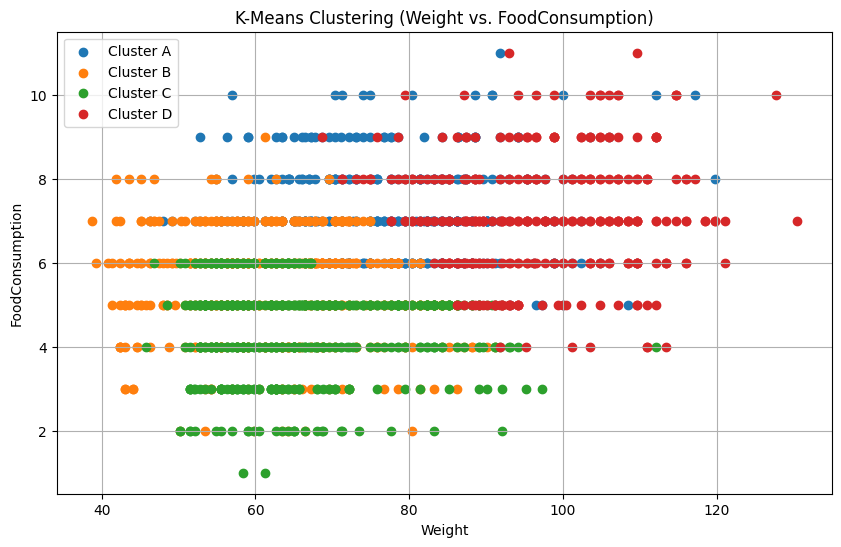

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datei laden
file_path = "data/Obesity_Dataset_FE.xlsx"
data = pd.read_excel(file_path)

# Relevante Spalten auswählen
selected_columns = ['Activity', 'Weight', 'FoodConsumption']
data_selected = data[selected_columns].copy()  # Kopie erstellen, um SettingWithCopyWarning zu vermeiden

# Daten skalieren
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# K-Means-Clusteranalyse
kmeans = KMeans(n_clusters=4, random_state=2, n_init=20)
kmeans.fit(data_scaled)

# Cluster-Zuordnungen hinzufügen
data_selected['Cluster'] = kmeans.labels_

# Benutzerdefinierte Cluster-Namen
cluster_names = ['Cluster A', 'Cluster B', 'Cluster C', 'Cluster D']

# Dimensionen, die wir verwenden wollen
dimensions = ['Activity', 'FoodConsumption', 'Weight']

# Visualisierung

# 3D Plot
fig_num = 1  # Zähler für die Anzahl der Plots
fig = plt.figure(fig_num, figsize=(12, 10))  # Kleinere Plotgröße
ax = fig.add_subplot(111, projection='3d')
fig_num += 1

# Scatter-Plot für jedes Cluster erstellen
for cluster in range(4):  # Es gibt 4 Cluster
    cluster_data = data_selected[data_selected['Cluster'] == cluster]
    ax.scatter(
        cluster_data[dimensions[0]],
        cluster_data[dimensions[1]],
        cluster_data[dimensions[2]],
        label=cluster_names[cluster]  # Benutzerdefinierte Namen in der Legende
    )

# Titel und Achsenbeschriftungen
ax.set_title(f'K-Means Clustering ({dimensions[0]}, {dimensions[1]}, {dimensions[2]})', fontsize=16, pad=20)
ax.set_xlabel(dimensions[0], fontsize=12, labelpad=15)
ax.set_ylabel(dimensions[1], fontsize=12, labelpad=15)
ax.set_zlabel(dimensions[2], fontsize=12, labelpad=15)  # Gewicht-Achse

# Manuelle Skalierung der Achsen für bessere Sichtbarkeit
ax.set_xlim([min(data_selected[dimensions[0]]), max(data_selected[dimensions[0]])])
ax.set_ylim([min(data_selected[dimensions[1]]), max(data_selected[dimensions[1]])])
ax.set_zlim([min(data_selected[dimensions[2]]), max(data_selected[dimensions[2]])])

# Kamerawinkel anpassen, um alle Achsen gut sichtbar zu machen (Z-Achse nach rechts verschieben)
ax.view_init(elev=25, azim=135)  # Kamerawinkel so geändert, dass Z-Achse an den rechten Rand kommt

# Achsenticks für bessere Lesbarkeit
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='z', labelsize=10)

# Legende und Anzeige
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))  # Legende außerhalb platzieren
plt.subplots_adjust(left=0.05, right=0.85, top=0.9, bottom=0.1)  # Mehr Platz für Achsentitel
plt.show()

# 2D Plot: Activity vs. FoodConsumption
fig, ax = plt.subplots(figsize=(10, 8))
for cluster in range(4):
    cluster_data = data_selected[data_selected['Cluster'] == cluster]
    ax.scatter(
        cluster_data['Activity'],
        cluster_data['FoodConsumption'],
        label=cluster_names[cluster]
    )

ax.set_title('K-Means Clustering (Activity vs. FoodConsumption)', fontsize=16)
ax.set_xlabel('Activity', fontsize=12)
ax.set_ylabel('FoodConsumption', fontsize=12)
ax.legend()
plt.grid(True)
plt.show()

# 2D Plot: Weight vs. Activity
fig, ax = plt.subplots(figsize=(10, 8))
for cluster in range(4):
    cluster_data = data_selected[data_selected['Cluster'] == cluster]
    ax.scatter(
        cluster_data['Weight'],
        cluster_data['Activity'],
        label=cluster_names[cluster]
    )

ax.set_title('K-Means Clustering (Weight vs. Activity)', fontsize=16)
ax.set_xlabel('Weight', fontsize=12)
ax.set_ylabel('Activity', fontsize=12)
ax.legend()
plt.grid(True)
plt.show()

# 2D Plot: Weight vs. FoodConsumption
fig, ax = plt.subplots(figsize=(10, 8))
for cluster in range(4):
    cluster_data = data_selected[data_selected['Cluster'] == cluster]
    ax.scatter(
        cluster_data['Weight'],
        cluster_data['FoodConsumption'],
        label=cluster_names[cluster]
    )

ax.set_title('K-Means Clustering (Weight vs. FoodConsumption)', fontsize=16)
ax.set_xlabel('Weight', fontsize=12)
ax.set_ylabel('FoodConsumption', fontsize=12)
ax.legend()
plt.grid(True)
plt.show()